In [1]:
%matplotlib inline


===============================================
Creating a timeline with lines, dates, and text
===============================================

How to create a simple timeline using Matplotlib release dates.

Timelines can be created with a collection of dates and text. In this example,
we show how to create a simple timeline using the dates for recent releases
of Matplotlib. First, we'll pull the data from GitHub.


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime


# In case the above fails, e.g. because of missing internet connection
# use the following lists as fallback.
names = ['World Chess Champion defeated. Brute Force AI',
         'IBM Watson beats Jeopardy gameshow champion. Machine Learning AI',
         'World Go Champion defeated. Deep Learning AI']

dates = ['1997-05-11', '2011-01-14','2016-03-15']

# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

Next, we'll create a stem plot with some variation in levels as to
distinguish even close-by events. We add markers on the baseline for visual
emphasis on the one-dimensional nature of the time line.

For each event, we add a text label via `~.Axes.annotate`, which is offset
in units of points from the tip of the event line.

Note that Matplotlib will automatically plot datetime inputs.



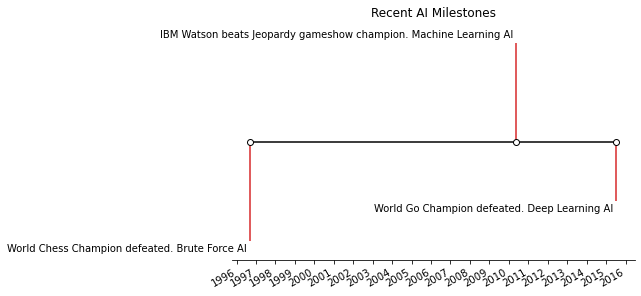

In [8]:
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Recent AI Milestones")

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.margins(y=0.1)
plt.savefig('timeline.svg', format='svg', bbox_inches="tight")
plt.show()

.. admonition:: References

   The use of the following functions, methods, classes and modules is shown
   in this example:

   - `matplotlib.axes.Axes.annotate`
   - `matplotlib.axes.Axes.vlines`
   - `matplotlib.axis.Axis.set_major_locator`
   - `matplotlib.axis.Axis.set_major_formatter`
   - `matplotlib.dates.MonthLocator`
   - `matplotlib.dates.DateFormatter`

